In [1]:
import numpy as np
import tensorflow as tf

/anaconda3/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
len(mnist.train.images), len(mnist.train.labels)

(55000, 55000)

In [4]:
len(mnist.test.images), len(mnist.test.labels)

(10000, 10000)

In [5]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
len(mnist.train.images[0])

784

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

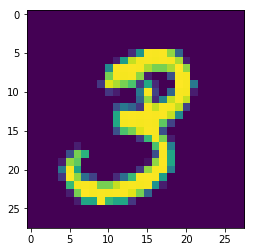

In [8]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [9]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [10]:
x = tf.placeholder("float", shape=[None, 784])
y = tf.placeholder("float", shape=[None, 10])

In [11]:
weight = tf.Variable(tf.truncated_normal([784,10]))
bias = tf.Variable(tf.truncated_normal([10]))

In [12]:
combine_input = tf.matmul(x, weight) + bias

In [13]:
pred = tf.nn.softmax(combine_input)

In [14]:
loss = -tf.reduce_sum(y * tf.log(pred))

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
for i in range(1100):
    batch = mnist.train.next_batch(50)
    sess.run(train_step, feed_dict={x : batch[0], y:batch[1]})
    if i%50 == 0:
            print(sess.run(loss, feed_dict={x : batch[0], y:batch[1]}))

329.698
114.416695
38.314323
20.213478
48.926674
26.53627
28.653086
43.464195
16.75724
39.731388
12.251608
32.379055
24.371075
18.137915
8.972845
24.207663
29.931976
7.5475473
10.576719
28.017235
14.364228
11.022556


In [18]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [19]:
acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
print(acc)

0.8813
